# Day 1 

In [1]:
import torch

In [2]:
x = torch.arange(12,dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
x.numel()

12

In [4]:
x = x.reshape(3,4)
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [5]:
x.reshape(-1,3) #-1 get the dimension on its own but col = 4

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])

In [6]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.randn(3,4)

tensor([[-1.8524,  0.9431, -0.7725,  1.1168],
        [ 0.6971,  0.7563, -0.9823, -0.3563],
        [-0.8447,  0.3462,  1.2673,  0.9912]])

In [8]:
 torch.zeros(2)

tensor([0., 0.])

In [9]:
x = torch.tensor([1.0,2,3,4])
y = torch.tensor([2,3,4,5])
x + y , x -y, x/y, x ** y

(tensor([3., 5., 7., 9.]),
 tensor([-1., -1., -1., -1.]),
 tensor([0.5000, 0.6667, 0.7500, 0.8000]),
 tensor([1.0000e+00, 8.0000e+00, 8.1000e+01, 1.0240e+03]))

In [10]:
x = torch.arange(12,dtype=torch.float32).reshape((3,4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

torch.cat((x,y),dim = 0) # Row wise

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

In [11]:
torch.cat((x,y),dim = 1) # column wise 

tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])

In [12]:
x.sum()

tensor(66.)

In [13]:
a = torch.arange(3).reshape((3, 1)) 
b = torch.arange(2).reshape((1, 2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [14]:
z = torch.tensor([[0,1]]) # z = torch.tensor([0,1])
z.shape

torch.Size([1, 2])

In [15]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [16]:

x,x[-1],x[1:3]

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [17]:
Z = torch.zeros_like(y)  
print('id(Z):', id(Z))
Z[:] = x + y   # slicing refers to the previously allocated array y . 
print('id(Z):', id(Z))

id(Z): 1434222980128
id(Z): 1434222980128


In [18]:
A = x.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [19]:
a = torch.tensor([3.5])
a, a.item(),float(a),int(a) # a.item() coverts size tensor 1 to python scalar


(tensor([3.5000]), 3.5, 3.5, 3)

In [20]:
x > y


tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [21]:
import os

os.makedirs(os.path.join('..', 'data'),exist_ok=True)   # '..' dir 1 step back './' same dir as file 
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # Column names
    f.write('NA,Pave,127500\n') # Each row represents a data example 
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')


In [22]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


 ##### iloc vs loc 
 iloc is integer-location based indexing . Example : df.iloc[4:6] # selects row 4 to 6 
 
 loc is select specific rows and column names . Example df.loc[['E':, :'assist']]
 
 

In [23]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [24]:
inputs = pd.get_dummies(inputs,dummy_na = True)  #dummy_na=True makes a column for Nan
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [25]:
import torch
X,y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

## Linear Algebra

In [26]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x+y, x*y, x **y 

(tensor(5.), tensor(6.), tensor(9.))

In [27]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

![Axis](../images/axis.jpg)

<h3><center>Axis Description</center></h3>

In [28]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [29]:
A_row = A.sum(axis=0)
A_row

tensor([40, 45, 50, 55])

In [30]:
A_col = A.sum(axis=1)
A_col, A_col.shape

(tensor([ 6, 22, 38, 54, 70]), torch.Size([5]))

In [31]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6],
        [22],
        [38],
        [54],
        [70]])

### Dot Products

In [32]:
x = torch.arange(4, dtype=torch.float32)
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [33]:
#Dot product same as torch.sum(x * y)
#Elementwise multiplication and sum 
torch.sum(x * y)

tensor(6.)

### Day 2

In [34]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)  # L2 Norm 

tensor(5.)

In [35]:
torch.abs(u).sum() # L1 Norm, less influenced by outliers

tensor(7.)

In [36]:
torch.norm(torch.ones((4,9))) # Frobenius Norm 

tensor(6.)

#### Derivation and Differentiation

In [37]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l 

In [38]:
def f(x):
    return 3 * x ** 2 -4 * x

In [39]:
def numerical_lim(f,x,h):
    return (f(x + h) - f(x)) / h
h = 0.1 
for i in range(5):
    print(f'h={h:.5f}, numerical limit = {numerical_lim(f,1,h):.5f}')
    h *= 0.1


h=0.10000, numerical limit = 2.30000
h=0.01000, numerical limit = 2.03000
h=0.00100, numerical limit = 2.00300
h=0.00010, numerical limit = 2.00030
h=0.00001, numerical limit = 2.00003


In [40]:
def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')

In [41]:
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [42]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [43]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

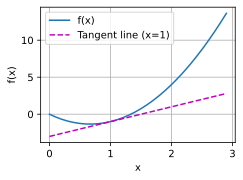

In [44]:
x = np.arange(0,3,0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [45]:
import torch 
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [46]:
x.requires_grad_(True)
x.grad

In [47]:
y = 2* torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [48]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [49]:
x.grad == 4 * x  # 70 - 74 

tensor([True, True, True, True])

#### Probability 

In [51]:
%matplotlib inline
import torch 
from torch.distributions import multinomial
from d2l import torch as d2l

In [56]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(10,fair_probs).sample()  # 10 samples from same distribution

tensor([3., 3., 0., 1., 2., 1.])

In [58]:
# 1000 rolls 
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts /1000

tensor([0.1700, 0.1670, 0.1720, 0.1790, 0.1350, 0.1770])

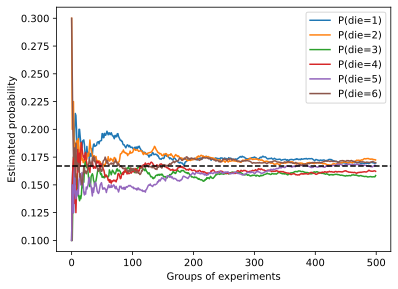

In [59]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0) 
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((6, 4.5)) 
for i in range(6): 
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed') 
d2l.plt.gca().set_xlabel('Groups of experiments') 
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();